# Import library

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd



In [ ]:
## retrieve website as html
url = "https://www.arb.ca.gov/aqmis2/display.php?param=PM25&units=001&statistic=DAVG&year=2020&mon=4&day=6&county_name=19-Los+Angeles&basin=--AIR+BASIN--&latitude=--PART+OF+STATE--&report=7DAY&order=s.name&submit=Retrieve+Data&ptype=aqd&std15="
#url = "https://www.arb.ca.gov/aqmis2/display.php?param=PM25&units=001&statistic=DAVG&year=2020&mon=4&day=6&county_name=--COUNTY--&basin=--AIR+BASIN--&latitude=S-Southern&report=7DAY&order=s.name&submit=Retrieve+Data&ptype=aqd&std15="
page=requests.get(url)
#turn the page into "soup"
soup = BeautifulSoup(page.text, 'html.parser')
print(page.text)



In [ ]:
# print "pretty" version of page's HTML
print(soup.prettify())

In [ ]:
#discover  all links and print out all Links text
links = soup.findAll('a')
for link in links:
    print(link.text)

In [ ]:
#discover table
table = soup.findAll('table')
table


In [ ]:
# we see a list of 7 tables were found. Play around to get more detail about table
print(len(table))

In [ ]:
print(table[0])

In [ ]:
ta1= table[1]
ta1


In [ ]:
# work wirth table 2 sicne it has all the infomation that we need
ta2 =table[2]
ta2


After inspected the table, the table inclues 3 main classes: 'tableHead2', 'tableEvenRow' and 'tableOddRow' that being uses for both <code> td </code> and <code> tr </code> tags


In [ ]:
# find all td with a class of "tableHead2"
head = ta2.find_all('td',{'tableHead2'})
head 

In [ ]:
# Get the header text 
row =[]
for i in head:
    row.append(i.text.strip())
row
    

In [ ]:
#Grab the header that we want to format.
header=row[0:11]
header

In [ ]:
# find all td with a class of "tableEvenRow"
data1 = ta2.find_all('td',{'tableEvenRow'})
print(len(data1))
# format strings then put them into a list



In [ ]:
# Get the text 
even=[]
for i in data1:
    even.append(i.text.strip())
even

In [ ]:
# Seperate the above list into evenly sized chunks (size of 11)

even_value=[]
for i in range(0,len(even),11):
    even_value.append(even[i:i+11])

even_value


In [ ]:
#find all td with a class of "tableOddRow" . Same process as tableEvenRow
data2 = ta2.find_all('td',{'tableOddRow'})

odd= [data123.text.replace(u"\xa0", u"").strip() for data123 in data2]

odd_value=[]
for i in range(0,len(odd),11):
    odd_value.append(odd[i:i+11])

odd_value

In [ ]:
# combind them into 1 list
lis_data = even_value + odd_value 
lis_data

In [ ]:
import pandas as pd

In [ ]:
df1=pd.DataFrame(lis_data,columns=header)
df1

In [ ]:
# Use pandas to make a dataframe
df= pd.DataFrame(lis_data,columns=header)
df

In [ ]:
# Create csv file.
df.to_csv (r'~/Desktop/Python/air_poll.csv', index = False, header=True)

In [ ]:
first_df = makeFrame(soup)

In [2]:
def makeFrame(soup):
    table = soup.find_all('table')
    ta2 =table[2]
    head = ta2.find_all('td',{'tableHead2'}) #header row
    data1 = ta2.find_all('td',{'tableEvenRow'}) #even row
    data2 = ta2.find_all('td',{'tableOddRow'}) #odd row 
    
    #Get header
    header_row=[]
    for i in head:
        header_row.append(i.text.strip())
    header=header_row[0:11] # Header will use to make dataframe

    #Getall td with a class of "tableEvenRow"
    even=[]
    for i in data1:
        even.append(i.text.strip())
    even_value= [even[i:i+11] for i in range(0,len(even),11)]   #all evenrows
    
    
    #Getall td with a class of "tableOddRow"
    odd= [data123.text.strip() for data123 in data2] 
    odd_value=[odd[i:i+11] for i in range (0,len(odd),11)] #all evenrows

    # combind them into 1 list
    lis_data = even_value + odd_value
    
    df =pd.DataFrame(lis_data,columns=header)
    return df



        
        

In [ ]:
url_list=[]
for day in range (1,32,6):
    url="https://www.arb.ca.gov/aqmis2/display.php?year=2020&mon=4&day="+str(day)+"&param=PM25&units=001&statistic=DAVG&order=basin%2Ccounty_name%2Cname&county_name=19-Los+Angeles&basin=--AIR+BASIN--&latitude=--PART+OF+STATE--&std15=&o3switch=new&hours=all&ptype=aqd&report=7DAY&btnsubmit=Update+Display"
    url_list.append(url)
    time.sleep(2)

In [ ]:
soup_list=[]
for i in url_list:
    page=requests.get(i)
    soup = BeautifulSoup(page.text, 'html.parser')
    soup_list.append(soup)

In [ ]:
print(len(soup_list))

In [ ]:
soup_list[0]


In [ ]:
da_lis=[]
for i in soup_list:
    da_lis.append(makeFrame(i))

In [ ]:
for i in da_lis[1::]:
    i.drop(i.columns[0:5],axis=1,inplace=True)

In [ ]:
final = pd.concat(da_lis,axis=1)

In [ ]:
final.drop(["7 Day Max"],axis=1, inplace = True)

In [ ]:
final

In [ ]:
import matplotlib

In [ ]:
final.to_csv ('~/Desktop/air_poll.csv', index = False, header=True)

In [3]:
url_list1=[]
for month in (2,3,4,5):
    for day in range (1,32,6):
        url="https://www.arb.ca.gov/aqmis2/display.php?year=2020&mon="+str(month)+"&day="+str(day)+"&param=PM25&units=001&statistic=DAVG&order=basin%2Ccounty_name%2Cname&county_name=19-Los+Angeles&basin=--AIR+BASIN--&latitude=--PART+OF+STATE--&std15=&o3switch=new&hours=all&ptype=aqd&report=7DAY&btnsubmit=Update+Display"
        #print(url)
        url_list1.append(url)
        time.sleep(2)

In [4]:
soup_list1=[]
for i in url_list1:
    page=requests.get(i)
    soup = BeautifulSoup(page.text, 'html.parser')
    soup_list1.append(soup)

In [5]:
da_lis1=[]
for i in soup_list1:
    da_lis1.append(makeFrame(i))

In [6]:
for i in da_lis1[1::]:
    i.drop(i.columns[0:5],axis=1,inplace=True)

In [ ]:
print(len(da_lis1))

In [7]:
dg = pd.concat(da_lis1,axis=1)



In [8]:
dg.drop(['7 Day Max'], axis=1, inplace=True)

In [9]:
dg= dg.apply(pd.to_numeric,errors='ignore')

In [10]:
dg.dtypes

Bas            object
Cnty           object
Site Name      object
01/26/2020    float64
01/27/2020    float64
01/28/2020    float64
01/29/2020    float64
01/30/2020    float64
01/31/2020    float64
02/01/2020    float64
02/02/2020    float64
02/03/2020    float64
02/04/2020    float64
02/05/2020    float64
02/06/2020    float64
02/07/2020    float64
02/08/2020    float64
02/09/2020    float64
02/10/2020    float64
02/11/2020    float64
02/12/2020    float64
02/13/2020    float64
02/14/2020    float64
02/15/2020    float64
02/16/2020    float64
02/17/2020    float64
02/18/2020    float64
02/19/2020    float64
02/20/2020    float64
02/21/2020    float64
               ...   
05/02/2020    float64
05/03/2020    float64
05/04/2020    float64
05/05/2020    float64
05/06/2020    float64
05/07/2020    float64
05/08/2020    float64
05/09/2020    float64
05/10/2020    float64
05/11/2020    float64
05/12/2020    float64
05/13/2020    float64
05/14/2020    float64
05/15/2020    float64
05/16/2020

In [11]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
dg.drop(['Bas','Cnty'], axis=1, inplace= True)


In [13]:
dg.set_index(['Site Name'],inplace = True)

In [14]:
da=dg.transpose()

In [26]:
da.iloc[:,2]

01/26/2020    39.8
01/27/2020    17.7
01/28/2020     5.8
01/29/2020     5.5
01/30/2020    11.3
01/31/2020    11.6
02/01/2020     9.4
02/02/2020    14.9
02/03/2020     4.9
02/04/2020     5.8
02/05/2020     9.4
02/06/2020    14.0
02/07/2020    18.7
02/08/2020    23.2
02/09/2020    13.4
02/10/2020     5.1
02/11/2020     5.5
02/12/2020    12.3
02/13/2020    16.6
02/14/2020    19.4
02/15/2020    20.1
02/16/2020    22.5
02/17/2020    22.3
02/18/2020    21.8
02/19/2020    26.5
02/20/2020    18.9
02/21/2020    15.2
02/22/2020     8.3
02/23/2020    13.4
02/24/2020    17.3
              ... 
05/02/2020    13.4
05/03/2020    11.0
05/04/2020    15.4
05/05/2020    14.3
05/06/2020     NaN
05/07/2020     NaN
05/08/2020     NaN
05/09/2020     NaN
05/10/2020     NaN
05/11/2020     NaN
05/12/2020     NaN
05/13/2020     NaN
05/14/2020     NaN
05/15/2020     NaN
05/16/2020     NaN
05/17/2020     NaN
05/18/2020     NaN
05/19/2020     NaN
05/20/2020     NaN
05/21/2020     NaN
05/22/2020     NaN
05/23/2020  

Text(0, 0.5, 'Pm25 index')

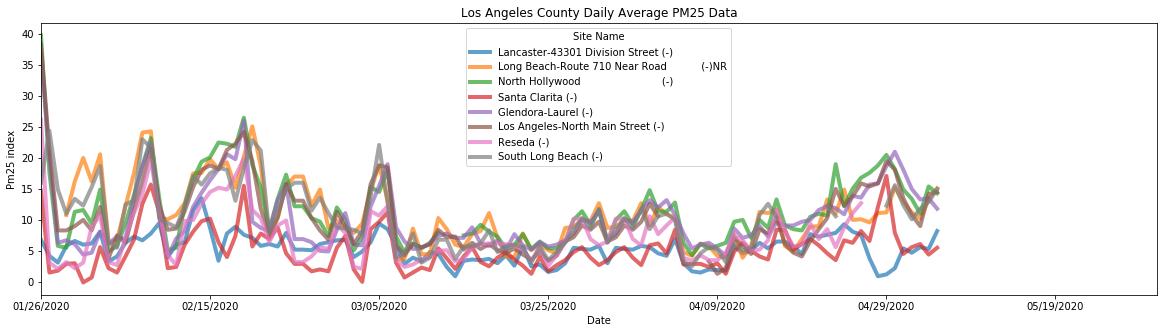

In [30]:
da.plot(kind='line', figsize=(20,5), linewidth=4, alpha= 0.7)

plt.title("Los Angeles County Daily Average PM25 Data")
plt.xlabel("Date")
plt.ylabel("Pm25 index")
#plt.plot( da.iloc[:,2], marker='', color='orange', linewidth=4, alpha=0.7)

In [ ]:
dg.to_csv ('~/Desktop/air_poll1.csv', index = False, header=True)

In [ ]:
]